In [3]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [4]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


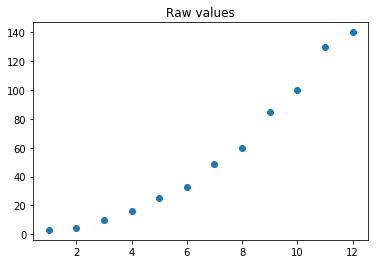

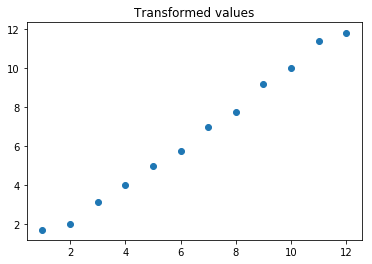

In [5]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

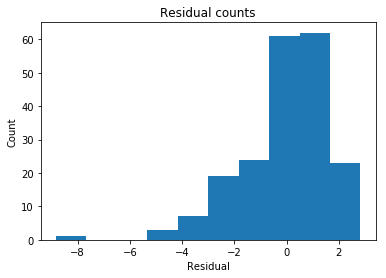

In [6]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [7]:
list(data.items())

[('Unnamed: 0', 0        1
  1        2
  2        3
  3        4
  4        5
  5        6
  6        7
  7        8
  8        9
  9       10
  10      11
  11      12
  12      13
  13      14
  14      15
  15      16
  16      17
  17      18
  18      19
  19      20
  20      21
  21      22
  22      23
  23      24
  24      25
  25      26
  26      27
  27      28
  28      29
  29      30
        ... 
  170    171
  171    172
  172    173
  173    174
  174    175
  175    176
  176    177
  177    178
  178    179
  179    180
  180    181
  181    182
  182    183
  183    184
  184    185
  185    186
  186    187
  187    188
  188    189
  189    190
  190    191
  191    192
  192    193
  193    194
  194    195
  195    196
  196    197
  197    198
  198    199
  199    200
  Name: Unnamed: 0, Length: 200, dtype: int64), ('TV', 0     230.100
  1      44.500
  2      17.200
  3     151.500
  4     180.800
  5       8.700
  6      57.500
  7     120.200
  8       8.

In [10]:
residual[(residual>-4)&(residual<0)]=1

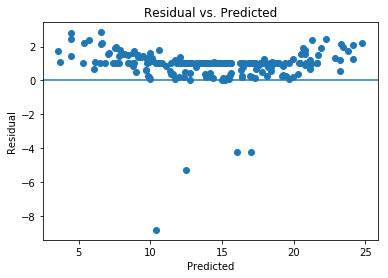

In [11]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
#Your data has a problem with both heteroscedasticity and multivariate non-normality. 
#Use the cell(s) below to see what you can do to fix it.

I did it!! Thanks for the extra practice it totally helped, I will keep working through them to help with these challenges :) 